<a href="https://colab.research.google.com/github/swiryat/Alice-skill/blob/master/%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error


# Данные для регрессии

In [ ]:
!gdown 1WbpJZBk-e-Y8KC-WtWzvJuLcEWwYd3qn
df = pd.read_csv('/content/sample.csv')
try:
  df = df.drop(columns='Unnamed: 0')
  df.head()
except:
  df.head()

Downloading...
From: https://drive.google.com/uc?id=1WbpJZBk-e-Y8KC-WtWzvJuLcEWwYd3qn
To: /content/sample.csv
100% 627k/627k [00:00<00:00, 13.7MB/s]


In [ ]:
df.head()

,feature1,feature_new,y
0,0.582624,1.515718,34.361468
1,-1.310930,-1.763046,-110.037744
2,-0.762516,-1.398488,161.519668
3,0.177450,0.920545,2.619852
4,-1.306872,-2.471682,81.517359


In [ ]:
df.head()

,feature1,feature_new,y
0,0.582624,1.515718,34.361468
1,-1.310930,-1.763046,-110.037744
2,-0.762516,-1.398488,161.519668
3,0.177450,0.920545,2.619852
4,-1.306872,-2.471682,81.517359


# Подготовка данных

In [ ]:
features = list(df.columns)
target = 'y'
try:
  features.remove(target)
except Exception as e:
  print(e)

In [ ]:
features

['feature1', 'feature_new']

In [ ]:
X = df[features]
try:
  y = df[target]
except Exception as e:
  print(e)

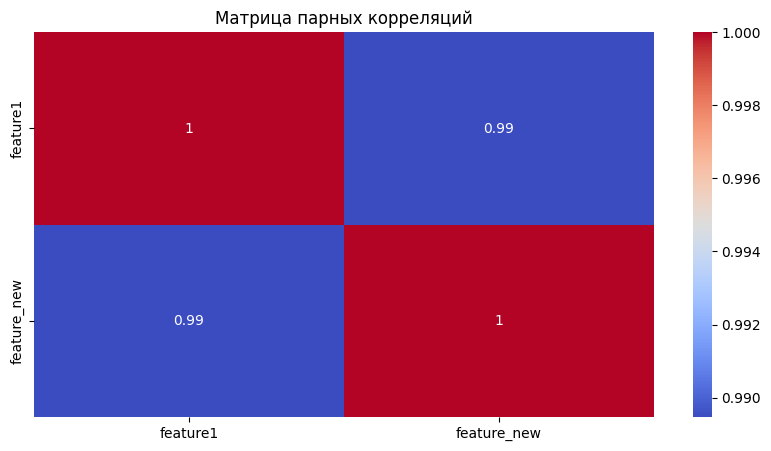

In [ ]:
# Расчет матрицы парных корреляций

correlation_matrix = X.corr()

# Визуализация матрицы парных корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица парных корреляций')
plt.show()

In [ ]:
# разделение данных на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.corr()

,feature1,feature_new
feature1,1.000000,0.989409
feature_new,0.989409,1.000000


In [ ]:
# Нормализация признаков для лучшей сходимости. Рассказать про важность нормализации именно для регуляризации
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# задаем интервал перебора для alpha
# альфа зависит от размера выборки

start = 0.0      # Начальное значение диапазона
stop = 1000       # Конечное значение диапазона (не включается в результат)
step = 10       # Шаг между значениями
float_range = np.arange(start, stop, step)
print(float_range)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270.
 280. 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410.
 420. 430. 440. 450. 460. 470. 480. 490. 500. 510. 520. 530. 540. 550.
 560. 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690.
 700. 710. 720. 730. 740. 750. 760. 770. 780. 790. 800. 810. 820. 830.
 840. 850. 860. 870. 880. 890. 900. 910. 920. 930. 940. 950. 960. 970.
 980. 990.]


# RIDGE  регрессия

In [ ]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []
for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Ridge(alpha=alpha, max_iter=1000) # alpha — величина регуляризации
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)

  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  avg_coefficients.append(coefficients)

In [ ]:
avg_coefficients = np.transpose(avg_coefficients)

In [ ]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))


fig.add_trace(go.Scatter(x=x, y=mse_list,
                mode='lines',
                name='mse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 50, где достигается наименьшая ошибка

# LASSO  регрессия

In [ ]:
start = 0.0      # Начальное значение диапазона
stop = 0.2     # Конечное значение диапазона (не включается в результат)
step = 0.001       # Шаг между значениями

float_range = np.arange(start, stop, step)


In [ ]:
R_2_scores = []
avg_coefficients = []
mae_list = []
mse_list = []

# Нормализация признаков для лучшей сходимости.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for alpha in float_range:

  if alpha == 0:
    model = LinearRegression()
  else:
    model = Lasso(alpha=alpha, max_iter=1000)
  # Обучение модели на обучающих данных.
  model.fit(X_train_scaled, y_train)
  y_pred_test = model.predict(X_test_scaled)
  # Оценка качества модели на тестовых данных.
  mse = mean_squared_error(y_test, y_pred_test )
  mse_list.append(mse)
  # Веса (коэффициенты) модели с L1-регуляризацией.
  coefficients = model.coef_
  avg_coefficients.append(coefficients)
avg_coefficients = np.transpose(avg_coefficients)


In [ ]:
x = float_range
y = avg_coefficients
selected_y = y[0]
# Create traces
fig = go.Figure()
for i, feature in enumerate(features):
# for i in range(10):
  selected_y = y[i]
  fig.add_trace(go.Scatter(x=x, y=selected_y,
                mode='lines',
                name=feature))
fig.add_trace(go.Scatter(x=x, y=mse_list,
                mode='lines',
                name='mse'))
fig.show()
# график интерактивный (нажмите мышкой на feature_new, feature1, mse)

По графику видно, что оптимальным коэффициентом регуляризации является значение 0.03, где достигается наименьшая ошибка

# Сравним как работает линейная регрессия и регрессии с регуляризацией для оптимального значения параметра регуляризации

In [ ]:
# построим линейную регрессию
model = LinearRegression()

model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model.coef_

In [ ]:
mse_test, mse_train

(10345.441528357813, 9871.550379011118)

In [ ]:
coefficients

array([10.70350945, -2.79069558])

In [ ]:
# построим линейную регрессию
# model = LinearRegression()
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train_scaled, y_train)
y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model.coef_

In [ ]:
model.intercept_

array([-0.45768038])

In [ ]:
mse_test, mse_train

(10340.765338158155, 9873.21439190325)

In [ ]:
coefficients

array([ 9.03570922, -0.16311596])



В данных наблюдается мультиколлинеарность, возможно по этой причине коэффициенты слишком высокие


Проведем регуляризацию L1 и L2






In [ ]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg = Lasso(alpha=0.03, max_iter=1000) # alpha — величина регуляризации

# обучение
model_reg.fit(X_train_scaled, y_train)
y_pred_test = model_reg.predict(X_test_scaled)
y_pred_train = model_reg.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model_reg.coef_

In [ ]:
mse_test, mse_train

(10345.058696895247, 9871.715363118346)

In [ ]:
model.intercept_

array([-0.45768038])

In [ ]:
coefficients

array([ 7.9123688, -0.       ])

In [ ]:
print(f'ТО есть мы получили модель y = {model.intercept_[0]} + {coefficients[0]} * feature1 + {coefficients[1]} * feature_new')

ТО есть мы получили модель y = -0.45768037902879305 + 7.912368795113259 * feature1 + -0.0 * feature_new


In [ ]:
# построим регрессию Лассо с оптимальным параметром регуляризации, который мы подобрали перебором
model_reg = Ridge(alpha=50, max_iter=10000) # alpha — величина регуляризации

# обучение
model_reg.fit(X_train_scaled, y_train)
y_pred_test = model_reg.predict(X_test_scaled)
y_pred_train = model_reg.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test )

mse_train = mean_squared_error(y_train, y_pred_train )

coefficients = model_reg.coef_

In [ ]:
mse_test, mse_train

(10345.187376527107, 9871.707614391493)

In [ ]:
model.intercept_

array([-0.45768038])

In [ ]:
coefficients

array([ 7.97167858, -0.08717356])

In [ ]:
print(f'ТО есть мы получили модель y = {model.intercept_[0]} + {coefficients[0]} * feature1 + {coefficients[1]} * feature_new')

ТО есть мы получили модель y = -0.45768037902879305 + 7.971678583310963 * feature1 + -0.08717356313089523 * feature_new


Модель с регуляризацией L1 занулила коэффициент при feature1, модель с L2 регуляризацией снизила коэффициент